<a href="https://colab.research.google.com/github/Blvisse/Notebook/blob/master/CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Libraries and Load data from sklearn Library








In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.datasets import fetch_california_housing

Lets Load the dataset into californiHousing variable

In [103]:
califroniaHousing=fetch_california_housing()

# **Let's See what we have**



##we we'll go through the description file and have a look at what data is included into the Califronia Housing Dataset

In [104]:
califroniaHousing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

##*First things first let's have a look at the description file*

In [105]:
print(califroniaHousing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

We have learnt alot from the description file like:
 

1.  we have 20640 rows and 8 columns 
2.  We do not hae any missing values 
3.  we have the legend of the columns






## *We look at the feature names which translate into column names*

In [106]:
print(califroniaHousing.feature_names)
#these are the faetures that are in the data set


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


##We look at the data

In [107]:
print(califroniaHousing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


#**let's load the indipendent variable(features)into X and the target(dependent)feature into y** 

In [108]:
X=pd.DataFrame(califroniaHousing.data,columns=califroniaHousing.feature_names)
y=pd.DataFrame(califroniaHousing.target,columns=['TargetPrice'])

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [110]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [111]:
y

,TargetPrice
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [112]:
X.shape

(20640, 8)

In [113]:
data=pd.concat([X,y],axis=1)

In [114]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TargetPrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Let's Carry Out Exploratory Data Analysis to get some treands 

In [115]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TargetPrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


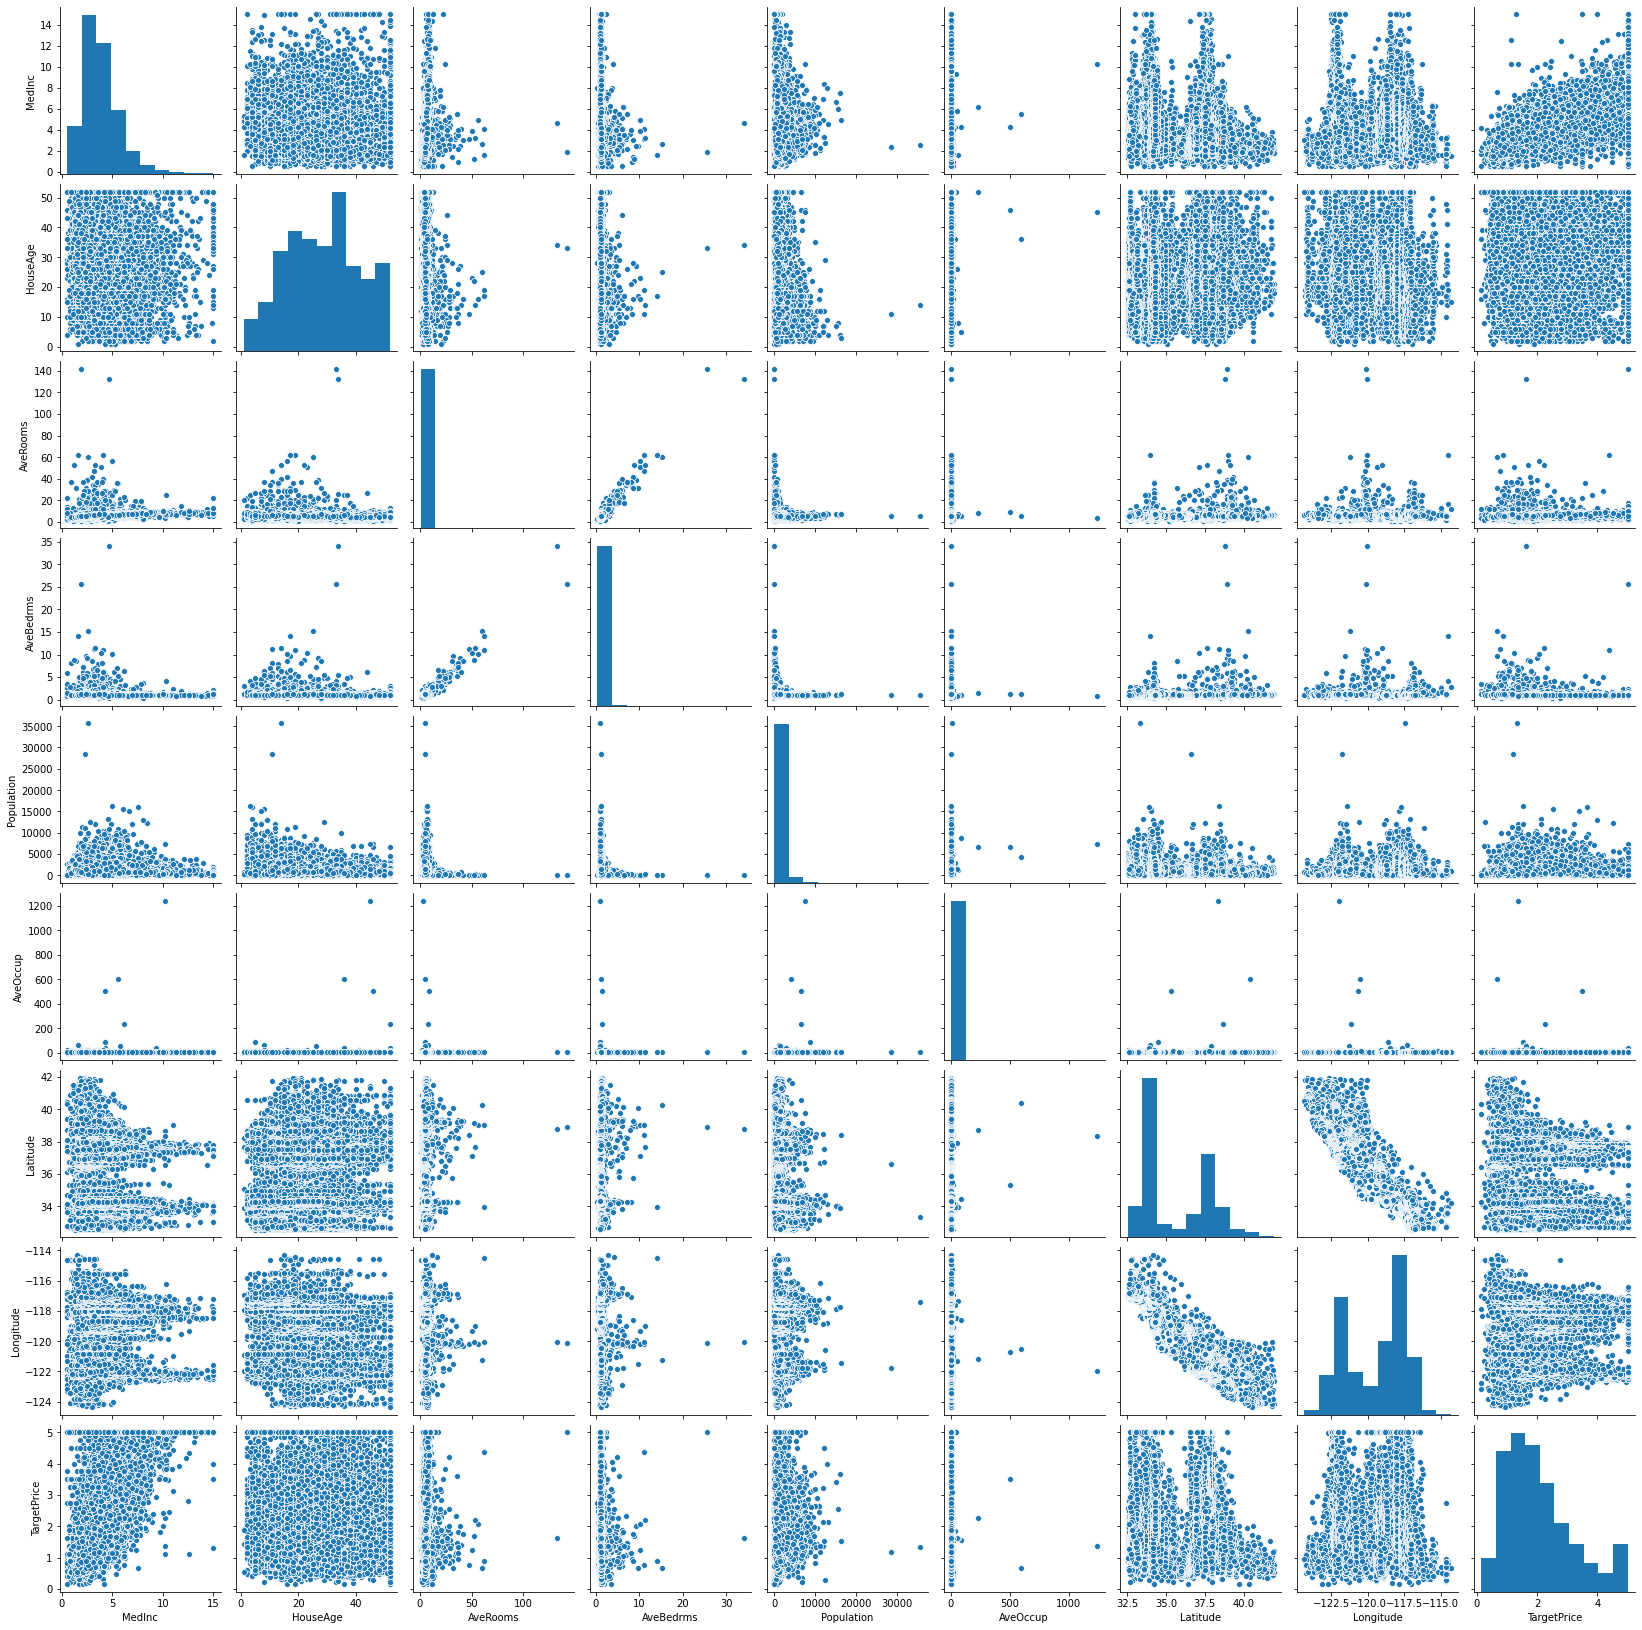

In [116]:
sns.pairplot(data)

[]

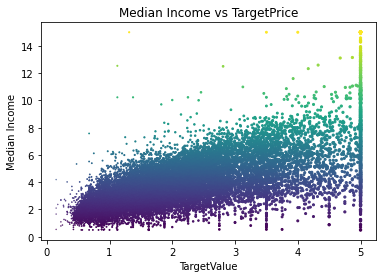

In [117]:
plt.scatter(data['TargetPrice'],data['MedInc'],c=data['MedInc'],s=data['TargetPrice'])
plt.colorbar
plt.title('Median Income vs TargetPrice')
plt.ylabel('Median Income')
plt.xlabel('TargetValue')
plt.plot()


We see we have a couple of outliers in this data

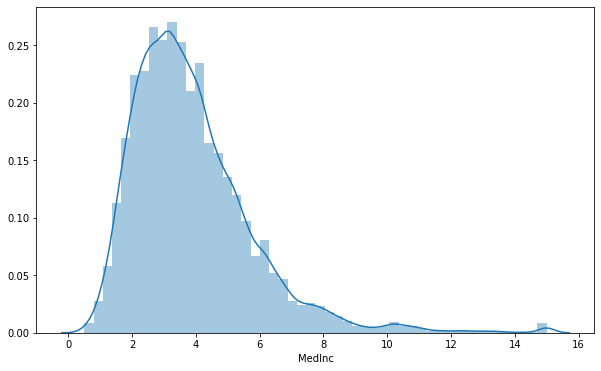

In [118]:
plt.figure(figsize=(10,6))
sns.distplot(data['MedInc'])
plt.show()

[]

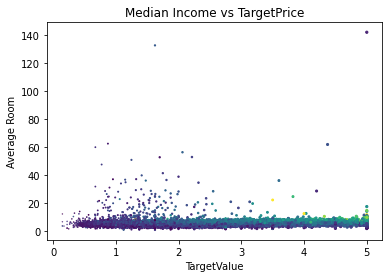

In [119]:
plt.scatter(data['TargetPrice'],data['AveRooms'],c=data['MedInc'],s=data['TargetPrice'])
plt.colorbar
plt.title('Median Income vs TargetPrice')
plt.ylabel('Average Room')
plt.xlabel('TargetValue')
plt.plot()

The average rooms has lots of outliers

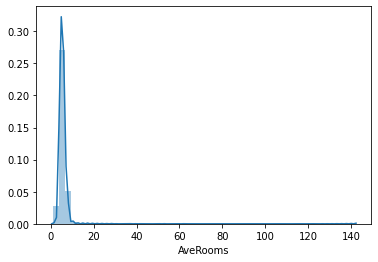

In [120]:
sns.distplot(data['AveRooms'])
plt.show()

# Feature Selection and Extraction

## Let's Use the Correlation Matrix to see which features go best

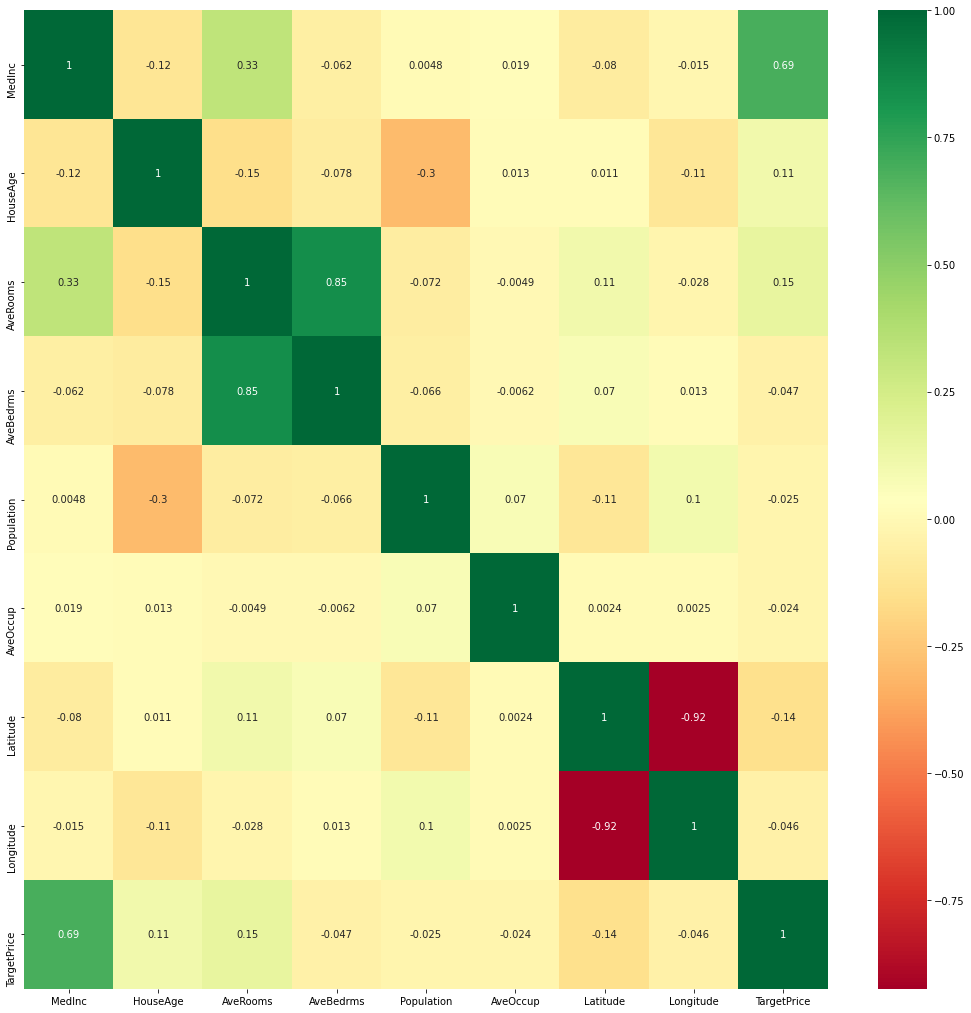

In [121]:
corrmat=data.corr()
best_corr_features=corrmat.index
plt.figure(figsize=(18,18))
maps=sns.heatmap(data[best_corr_features].corr(),annot=True,cmap='RdYlGn')


From above we realize values such as Lonitude and Lattitude really don't affect much;


1.   AveRooms and AveBedRms really correlate
2.   MedInc and TargetPrice 




In [122]:
data_test=pd.concat([data['AveRooms'],data['HouseAge'],data['MedInc'],data['TargetPrice']],axis=1)

In [123]:
data_test

,AveRooms,HouseAge,MedInc,TargetPrice
0,6.984127,41.0,8.3252,4.526
1,6.238137,21.0,8.3014,3.585
2,8.288136,52.0,7.2574,3.521
3,5.817352,52.0,5.6431,3.413
4,6.281853,52.0,3.8462,3.422
...,...,...,...,...
20635,5.045455,25.0,1.5603,0.781
20636,6.114035,18.0,2.5568,0.771
20637,5.205543,17.0,1.7000,0.923
20638,5.329513,18.0,1.8672,0.847


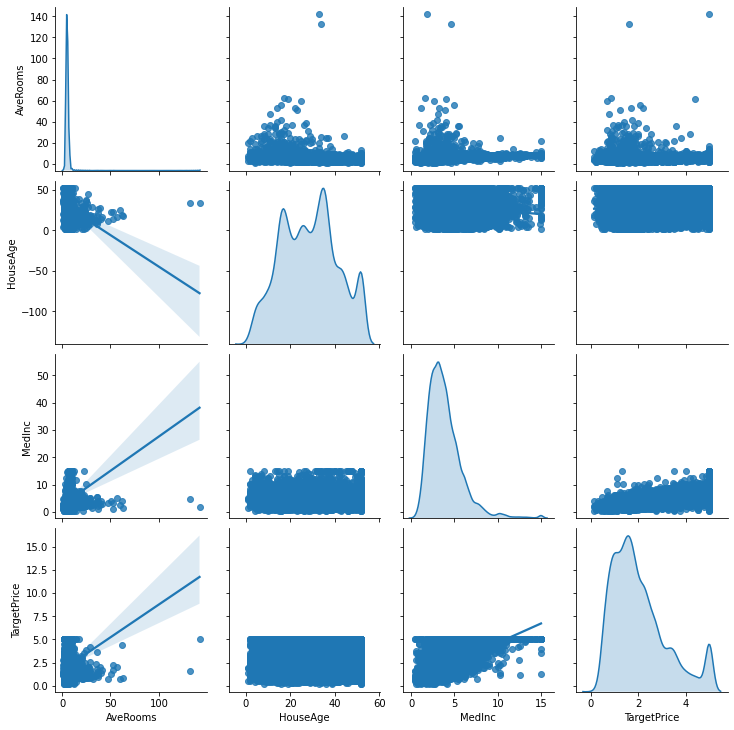

In [124]:
sns.pairplot(data_test,kind='reg',diag_kind='kde')

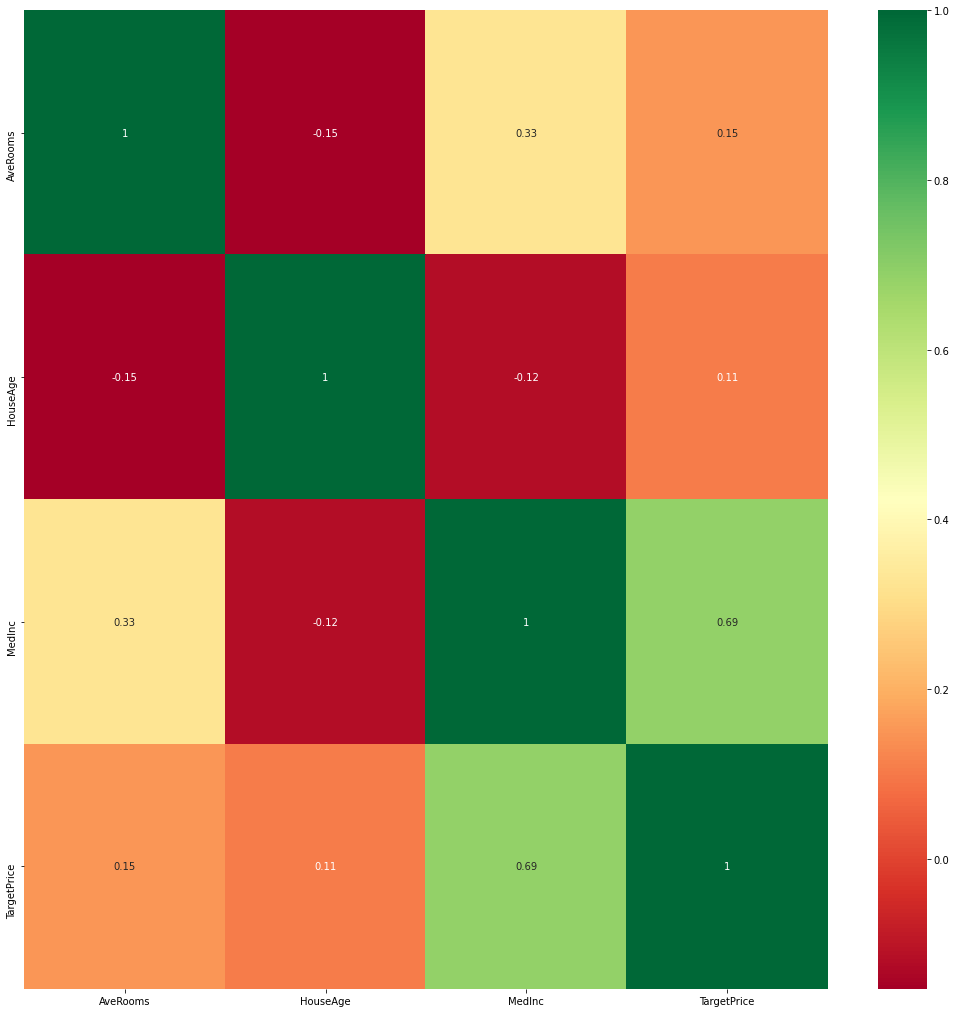

In [125]:
corrmat=data_test.corr()
best_corr_features=corrmat.index
plt.figure(figsize=(18,18))
maps=sns.heatmap(data_test[best_corr_features].corr(),annot=True,cmap='RdYlGn')


**These are the features we probably would like to have in our dataset as they really matter**

In [134]:
trialdata=data.copy()
X=PowerTransformer().fit_transform(X)
y=PowerTransformer().fit_transform(y)

In [135]:
pca=PCA(tol=0.9)
pca.fit_transform(X)

array([[ 2.33932269, -1.02949523, -1.8335065 , ..., -0.09784719,
        -0.53955907,  0.0622616 ],
       [ 1.6219248 , -1.61907108,  0.37282935, ..., -0.82819732,
        -0.07889224,  0.04218596],
       [ 2.33347969, -1.05645607, -1.69251047, ..., -0.90185999,
        -0.11154391, -0.02037291],
       ...,
       [ 1.70868247,  0.53115183,  1.02362314, ...,  0.78503908,
         0.66498355,  0.19578882],
       [ 1.98145311,  0.39190242,  0.55989777, ...,  0.74838176,
         0.46235028,  0.19762785],
       [ 1.53323783, -0.05594603,  1.38241174, ...,  0.44680835,
         0.1548238 ,  0.29428626]])

In [136]:
pca.explained_variance_ratio_

array([0.25800719, 0.21359309, 0.15324088, 0.15102081, 0.11091084,
       0.07878353, 0.02884524, 0.00559843])

In [137]:
pca2=PCA(n_components=2)
pca2=pca2.fit_transform(X)
pca_data=pd.DataFrame(pca2,columns=['PC1','PC2'])
target_data=pd.DataFrame(y,columns=['TargetPrice'])
final=pd.concat([pca_data,target_data],axis=1)
final

,PC1,PC2,TargetPrice
0,2.339323,-1.029495,1.715878
1,1.621925,-1.619071,1.281389
2,2.333480,-1.056456,1.247506
3,2.165364,0.052684,1.188835
4,2.335353,0.364186,1.193798
...,...,...,...
20635,1.689388,0.977962,-1.414289
20636,1.970410,-0.406708,-1.433165
20637,1.708682,0.531152,-1.160803
20638,1.981453,0.391902,-1.293200


In [ ]:
pca.n_

8

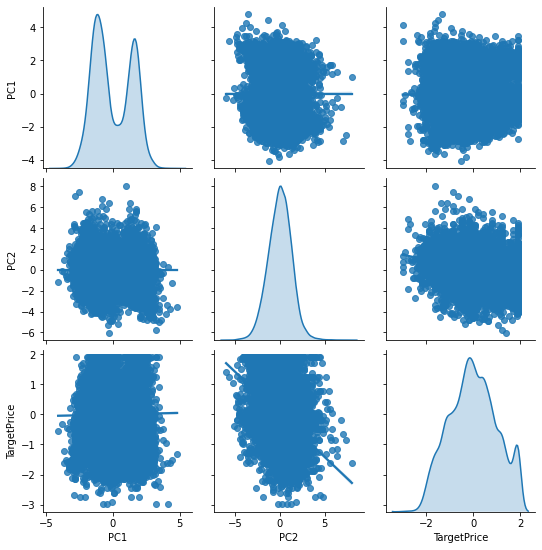

In [139]:
sns.pairplot(final,kind='reg',diag_kind='kde')

In [142]:
final.describe()

,PC1,PC2,TargetPrice
count,2.064000e+04,2.064000e+04,2.064000e+04
mean,1.588598e-15,1.419111e-16,1.140173e-15
std,1.436717e+00,1.307221e+00,1.000024e+00
min,-4.079664e+00,-6.037672e+00,-2.997447e+00
25%,-1.211293e+00,-8.470487e-01,-7.379200e-01
50%,-4.100618e-01,3.632690e-02,-1.611421e-02
75%,1.428849e+00,8.638140e-01,7.085479e-01
max,4.793707e+00,8.061784e+00,1.898584e+00


In [143]:
final_array=final.to_numpy()

In [144]:
final_array

array([[ 2.33932269, -1.02949523,  1.71587846],
       [ 1.6219248 , -1.61907108,  1.28138932],
       [ 2.33347969, -1.05645607,  1.24750645],
       ...,
       [ 1.70868247,  0.53115183, -1.1608032 ],
       [ 1.98145311,  0.39190242, -1.29319971],
       [ 1.53323783, -0.05594603, -1.21047554]])

In [146]:
final_array=list(final.columns)
final_array
X2=final.loc[:,final_array[0]:final_array[-2]].values
y2=final.loc[:,final_array[-1]].values

In [147]:
X_train, X_test, y_train, y_test= train_test_split(X2,y2,test_size=0.2,random_state=0)

In [151]:
result = {}
models = {'LinearRegression':linear_model.LinearRegression(),
          'Lasso':linear_model.Lasso(),
          'Ridge':linear_model.Ridge(),
          'ElasticNet':linear_model.ElasticNet()}

for i in models:
  models[i].fit(X_train,y_train)
  accuracy = models[i].score(X_test,y_test)
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.121522,-0.000208,0.121522,-0.000208
